In [103]:
import pandas as pd

Checking an example csv for heart rate


In [104]:
df_ex_hr=pd.read_csv('datasets/COVID-19-Wearables/A0KX894_hr.csv')
df_ex_hr.head(10)

,user,datetime,heartrate
0,A0KX894,2026-07-22 00:00:04,78
1,A0KX894,2026-07-22 00:00:09,77
2,A0KX894,2026-07-22 00:00:14,76
3,A0KX894,2026-07-22 00:00:19,75
4,A0KX894,2026-07-22 00:00:24,74
5,A0KX894,2026-07-22 00:00:29,75
6,A0KX894,2026-07-22 00:00:34,74
7,A0KX894,2026-07-22 00:00:49,74
8,A0KX894,2026-07-22 00:00:54,77
9,A0KX894,2026-07-22 00:00:59,76


In [105]:
df_ex_hr.describe()

,heartrate
count,879561.000000
mean,76.706986
std,14.771697
min,47.000000
25%,66.000000
50%,75.000000
75%,85.000000
max,181.000000


In [106]:
df_ex_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879561 entries, 0 to 879560
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user       879561 non-null  object
 1   datetime   879561 non-null  object
 2   heartrate  879561 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 20.1+ MB


In [107]:
df_ex_hr['datetime'].describe()

count                  879561
unique                 879561
top       2026-07-22 00:00:04
freq                        1
Name: datetime, dtype: object

Max heart rate is normally 220 - 20, as the data recorded complies with the standards of Stanford universities, the participants should be around or superior to 20. lets do a quick check on one of the recorded data


In [108]:
nan_entries = df_ex_hr.isna().sum()
illogical_entries = df_ex_hr[(df_ex_hr['heartrate'] < 30)| (df_ex_hr['heartrate'] > 200)].sum()
print('Number of NaN entries: ', nan_entries)
print('Number of illogical entries: ', illogical_entries)

Number of NaN entries:  user         0
datetime     0
heartrate    0
dtype: int64
Number of illogical entries:  user         0.0
datetime     0.0
heartrate    0.0
dtype: float64


In [109]:
df_ex_steps=pd.read_csv('datasets/COVID-19-Wearables/A0KX894_hr.csv')
df_ex_steps.head(10)

,user,datetime,heartrate
0,A0KX894,2026-07-22 00:00:04,78
1,A0KX894,2026-07-22 00:00:09,77
2,A0KX894,2026-07-22 00:00:14,76
3,A0KX894,2026-07-22 00:00:19,75
4,A0KX894,2026-07-22 00:00:24,74
5,A0KX894,2026-07-22 00:00:29,75
6,A0KX894,2026-07-22 00:00:34,74
7,A0KX894,2026-07-22 00:00:49,74
8,A0KX894,2026-07-22 00:00:54,77
9,A0KX894,2026-07-22 00:00:59,76


In [110]:
df_ex_steps.describe()

,heartrate
count,879561.000000
mean,76.706986
std,14.771697
min,47.000000
25%,66.000000
50%,75.000000
75%,85.000000
max,181.000000


In [111]:
df_ex_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879561 entries, 0 to 879560
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user       879561 non-null  object
 1   datetime   879561 non-null  object
 2   heartrate  879561 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 20.1+ MB


In [112]:
df_ex_steps['datetime'].describe()

count                  879561
unique                 879561
top       2026-07-22 00:00:04
freq                        1
Name: datetime, dtype: object

Lets ittereate over the directories and save a dictionary containing the users name and the corresponding hr and steps

In [113]:
import os
dir_csv = 'datasets/COVID-19-Wearables/'
files = [f for f in os.listdir(dir_csv) if f.endswith('.csv')] # we can straight do it with os.listdir
# noticed there are some files with user name containing_1 or _2, so we need to put that into consideration
#user_name = [f.split('_')[0] if f.count("_")==1 else ""for f in files]
# will deal with it inside the dictionary better
user_name = [f.split('_')[0] for f in files]
mult=0
for i in user_name:
    if(user_name.count(i)) < 1:
        print('missing data for user: ', i)
    if(user_name.count(i)) > 2:
        mult+=1
       
user_name_unique = list(set(user_name))

dict_user_data={}   
for i in user_name_unique:
    dict_user_data[i] = dict()# I am not concatinating strings, there is a user with multi entries
    dict_user_data[i]['hr'] = [f for f in files if f == i+'_hr.csv']
    dict_user_data[i]['steps'] = [f for f in files if f == i+'_steps.csv']
    s=[f for f in files if f == i+'_sleep.csv']
    dict_user_data[i]['sleep'] = s if len(s)!=0 else None
    if files.count(i+'_steps_longterm.csv.csv')>0:
        dict_user_data[i]['steps_longterm']=i+'_steps_longterm.csv'
    if files.count(i+'_hr_longterm.csv.csv')>0:
        dict_user_data[i]['hr_longterm']=i+'_hr_longterm.csv'
    if files.count(i+'_sleep_longterm.csv.csv')>0:
        dict_user_data[i]['sleep_longterm']=i+'_sleep_longterm.csv'

import json
with open('datasets/dict_user_data.json', 'w') as fp:
    json.dump(dict_user_data, fp)
    
# to visualize all the directory structure


In [114]:
merged_df_same_user_dict = {}
merged_df_same_user_dict_2 = {}

for user in dict_user_data.keys():
    if dict_user_data[user]['hr'] != []:
        df_hr = pd.read_csv(dir_csv + dict_user_data[user]['hr'][0])
        df_hr['datetime'] = pd.to_datetime(df_hr['datetime'])
        df_hr.set_index('datetime', inplace=True)
        df_hr=df_hr.resample('1min').mean() # resample to 1 min
        #df_hr['heartrate'].resample('1min').mean()
    if dict_user_data[user]['steps'] != []:
        df_steps=pd.read_csv(dir_csv + dict_user_data[user]['steps'][0])
        df_steps['datetime'] = pd.to_datetime(df_steps['datetime'])
        df_steps.set_index('datetime', inplace=True)
        df_steps =df_steps.resample('1min') 
    merged_df_same_user_dict[user]=pd.merge(df_hr, df_steps, on="datetime", how="left")
    #merged_df_same_user_dict_2[user]=pd.merge(df_hr, df_steps, left_index=True, right_index=True, how="outer")
    



In [115]:
# kenerl doesnt work, so dividing the steps into 2 parts
for user in dict_user_data.keys():
    merged_df_same_user_dict[user].fillna(method='ffill', inplace=True)
    merged_df_same_user_dict[user]=merged_df_same_user_dict[user].rename(columns={ "user_x": "user"})
    merged_df_same_user_dict[user]=merged_df_same_user_dict[user].drop(columns=['user_y'], axis=1)
    merged_df_same_user_dict[user]=merged_df_same_user_dict[user].dropna()
    


In [116]:
#testing for specific instance

In [117]:
df_t = merged_df_same_user_dict['A0KX894']

In [118]:
df_t.head()

,user,heartrate,steps
datetime,,,
2026-07-22 00:03:00,A0KX894,77,0.0
2026-07-22 00:03:05,A0KX894,76,0.0
2026-07-22 00:03:10,A0KX894,75,0.0
2026-07-22 00:03:15,A0KX894,74,0.0
2026-07-22 00:03:30,A0KX894,75,0.0


Text(0, 0.5, 'steps')

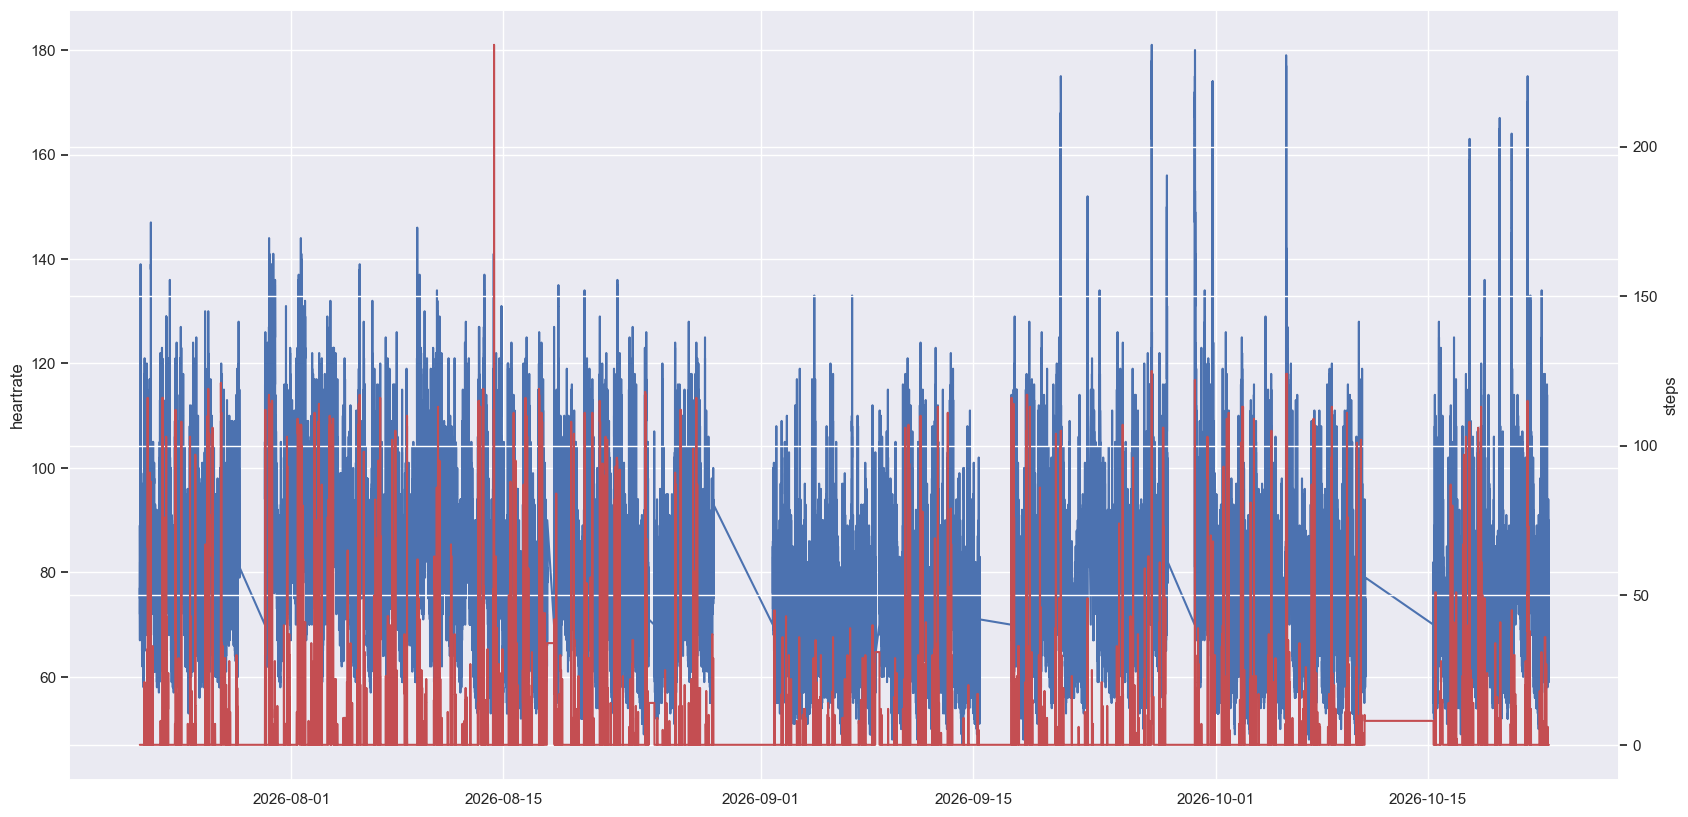

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
ax2=ax.twinx()
ax.plot(df_t['heartrate'])
ax2.plot(df_t['steps'], color='r')
ax.set_ylabel('heartrate')
ax2.set_ylabel('steps')


Text(0, 0.5, 'heartrate')

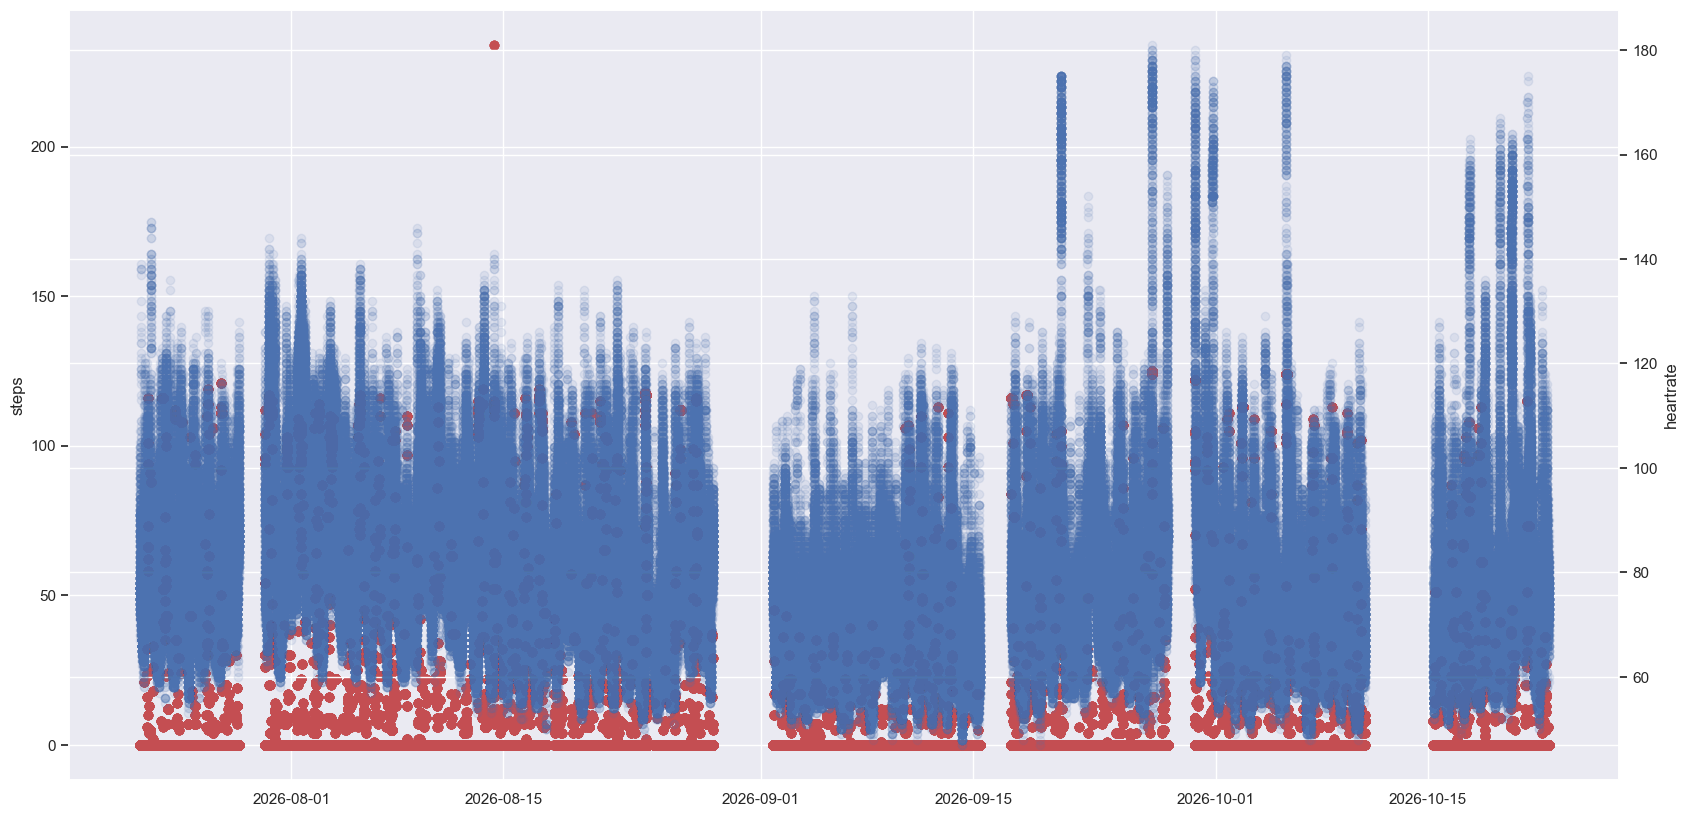

In [120]:
from math import gamma
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
ax2=ax.twinx()
ax.scatter(df_t.index,df_t['steps'],color='r',alpha=1) # different unit we know we dont do an ax twinx temporarily just to visualize correlation
ax2.scatter(df_t.index,df_t['heartrate'],alpha=0.1)
ax.set_ylabel('steps')
ax2.set_ylabel('heartrate')

In [121]:
df_t.head()

,user,heartrate,steps
datetime,,,
2026-07-22 00:03:00,A0KX894,77,0.0
2026-07-22 00:03:05,A0KX894,76,0.0
2026-07-22 00:03:10,A0KX894,75,0.0
2026-07-22 00:03:15,A0KX894,74,0.0
2026-07-22 00:03:30,A0KX894,75,0.0


In [122]:
import numpy as np
sec_t=60 * 24 * 60
df_t['totalsec_newday']=pd.to_timedelta(df_t.index.strftime('%H:%M:%S')).total_seconds()
df_t['sin_time'] = np.sin(2*np.pi*df_t['totalsec_newday']/sec_t)
df_t['cos_time'] = np.cos(2*np.pi*df_t['totalsec_newday']/sec_t)
df_t.head(1000)

,user,heartrate,steps,totalsec_newday,sin_time,cos_time
datetime,,,,,,
2026-07-22 00:03:00,A0KX894,77,0.0,180.0,0.013090,0.999914
2026-07-22 00:03:05,A0KX894,76,0.0,185.0,0.013453,0.999910
2026-07-22 00:03:10,A0KX894,75,0.0,190.0,0.013817,0.999905
2026-07-22 00:03:15,A0KX894,74,0.0,195.0,0.014180,0.999899
2026-07-22 00:03:30,A0KX894,75,0.0,210.0,0.015271,0.999883
...,...,...,...,...,...,...
2026-07-22 01:54:56,A0KX894,73,0.0,6896.0,0.480734,0.876867
2026-07-22 01:55:06,A0KX894,72,0.0,6906.0,0.481371,0.876517
2026-07-22 01:55:11,A0KX894,73,0.0,6911.0,0.481690,0.876342


/Users/rayendhahri/opt/anaconda3/envs/machine/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


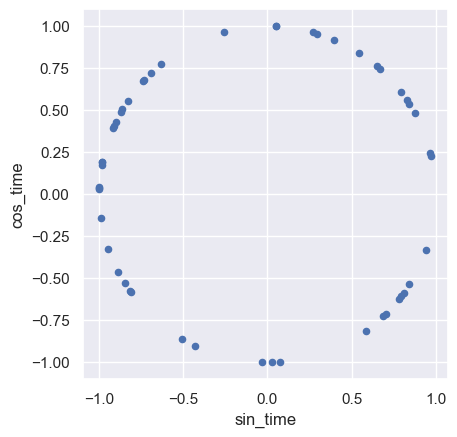

In [123]:
df_t.sample(50).plot.scatter('sin_time','cos_time').set_aspect('equal')

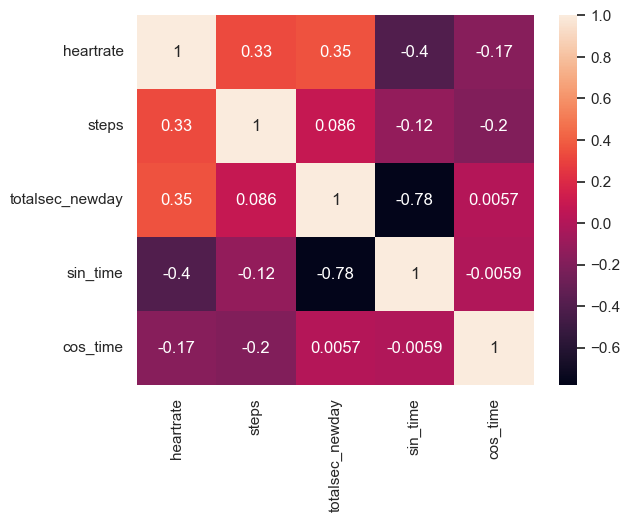

In [124]:
df_test=df_t.reset_index(level=0)
df_test['index1'] = df_t.index
corrMatrix = df_test.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [126]:
# we can already exclude features due to high correlation but not yet untill merge 
# sin and cos look promising 
for user in dict_user_data.keys():
    merged_df_same_user_dict[user]['totalsec_newday']=pd.to_timedelta(merged_df_same_user_dict[user].index.strftime('%H:%M:%S')).total_seconds()
    merged_df_same_user_dict[user]['sin_time'] = np.sin(2*np.pi*merged_df_same_user_dict[user]['totalsec_newday']/sec_t)
    merged_df_same_user_dict[user]['cos_time'] = np.cos(2*np.pi*merged_df_same_user_dict[user]['totalsec_newday']/sec_t)
    merged_df_same_user_dict[user]['time'] = merged_df_same_user_dict[user].index

In [127]:
df_master = pd.concat(merged_df_same_user_dict.values(), ignore_index=True)

In [128]:
df_master.head()

,user,heartrate,steps,totalsec_newday,sin_time,cos_time,time
0,A4G0044,73,0.0,0.0,0.000000,1.000000,2026-12-30 00:00:00
1,A4G0044,72,0.0,60.0,0.004363,0.999990,2026-12-30 00:01:00
2,A4G0044,70,0.0,120.0,0.008727,0.999962,2026-12-30 00:02:00
3,A4G0044,68,0.0,180.0,0.013090,0.999914,2026-12-30 00:03:00
4,A4G0044,78,0.0,240.0,0.017452,0.999848,2026-12-30 00:04:00


In [130]:
df_master["user"].unique() # confirmed all users are in the master df

array(['A4G0044', 'A0L9BM2', 'AX6281V', 'A0VFT1N', 'AIFDJZB', 'AHYIJDV',
       'AEOHH30', 'AAGTWZK', 'AQC0L71', 'AKV66US', 'AXI1PBS', 'AF3MXM1',
       'AUCGUF3', 'AFHOHOM', 'APHNRSV', 'A8QLAB0', 'AWA2KJK', 'AGA8XUN',
       'AMV7EQF', 'ARFYLMK', 'A5XL2IC', 'AGKI03N', 'AQ25Y0L', 'A06L7KF',
       'A6BUI4N', 'A2P3LTM', 'AFYLHG4', 'AZ35PI5', 'AWRBUQZ', 'AJWW3IY',
       'AHYR55C', 'A0KX894', 'AAF9ACE', 'AF3J1YC', 'AYVQUF1', 'A17YCA2',
       'A99ZKKW', 'A8CBEJZ', 'A6GEBIK', 'AQR8ZSS', 'ALZDAVZ', 'AUILKHG',
       'AFEFA29', 'AZIK4ZA', 'AO20DS4', 'AYWIEKR', 'A3OU183', 'AJ0DKQ3',
       'AL3KT5B', 'A65HVGP', 'AS2MVDL', 'A45F9E6', 'A0NVTRV', 'AK7YRBU',
       'A11SQQN', 'A91HEZV', 'AY8TPMP', 'AZKZ0AI', 'AA2KP1S', 'AD77K91',
       'AR4FPCC', 'AL48GP3', 'AOB9SON', 'ASFODQR', 'AV2GF3B', 'A4E0D03',
       'AE2B3RH', 'A2D7K4A', 'AFVAEC7', 'A0N9NV4', 'AW4EXXK', 'AUY8KYW',
       'APDJ1QP', 'AJMQUVV', 'A35BJNV', 'AX3KEW9', 'A36HR6Y', 'A9ZG5GR',
       'AJ7TSV9', 'AOGFRXL', 'ATT9RR1', 'APGIB2T', 

In [131]:
df_master.to_csv('datasets/df_master.csv')

In [134]:
len(df_master['user'].values)

72395019